In [63]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import LeaveOneOut

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

### Task 1.1: Design a dataset with at least 50 points for which the selection of C in a linear SVM makes a difference. 

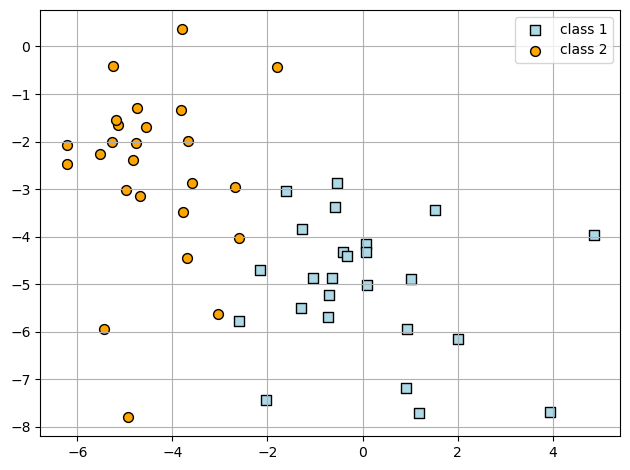

In [93]:
X, y = make_blobs(n_samples=50, centers=2, random_state=50, cluster_std=1.5)

plt.scatter(X[y == 0, 0],
            X[y == 0, 1],
            s=50, c='lightblue',
            marker='s', edgecolor='black',
            label='class 1')
plt.scatter(X[y == 1, 0],
            X[y == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='class 2')

plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

Since the misclassification penalty C, determines the decision boundary based on tolerance of misclassification, I increased the cluster standard deviation to 1.5 such that the clusters will be more spread out making some points from class 1 and 2 closer to eachother.

### Task 1.2: Load the data set (your own data set), train an SVM with a linear kernel on the full data set, and plot the data set with the decision boundary.

Use a large value for C such that we have a hard decision boundary.

In [94]:
model_linear_kern = SVC(kernel='linear', C = medium_margin_C)
model_linear_kern.fit(X, y)

SVC(C=1, kernel='linear')

In [95]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # plot the decision surface
    colors = ('lightblue', 'orange', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:2])
    x1_min, x1_max = xlim[0] - 1, xlim[1] + 1
    x2_min, x2_max = ylim[0] - 1, ylim[1] + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                           np.arange(x2_min, x2_max, 0.02))
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    ax.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)    
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, edgecolor='black', facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Support Vectors:
 [[-2.60749535 -5.76683011]
 [-1.60425619 -3.03997547]
 [-2.16143959 -4.70869647]
 [-1.79179229 -0.44165098]
 [-2.60802815 -4.03356195]
 [-3.04419328 -5.63358187]
 [-2.68401902 -2.94733101]]
Dual coefficients of the support vector in the decision function:  [[-1.         -1.         -0.71932374  0.08494257  1.          1.
   0.63438117]]


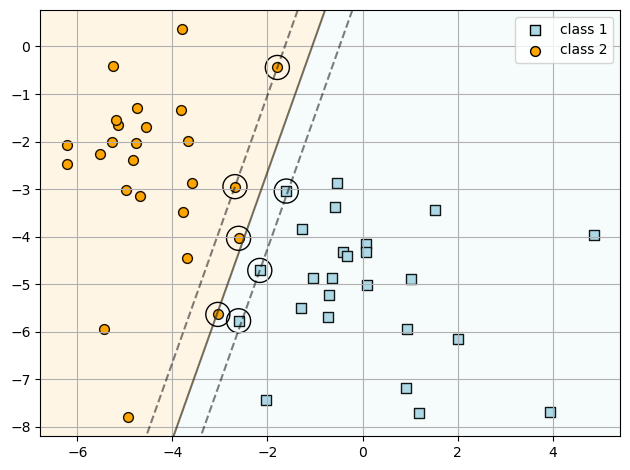

In [96]:
plt.scatter(X[y == 0, 0],
            X[y == 0, 1],
            s=50, c='lightblue',
            marker='s', edgecolor='black',
            label='class 1')
plt.scatter(X[y == 1, 0],
            X[y == 1, 1],
            s=50, c='orange',
            marker='o', edgecolor='black',
            label='class 2')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()

plot_svc_decision_function(model_linear_kern);

print( "Support Vectors:\n", model_linear_kern.support_vectors_)
print( "Dual coefficients of the support vector in the decision function: ", model_linear_kern.dual_coef_)

### Task 1.3: Carry out a leave-1-out cross-validation with an SVM on your dataset. Report the train and test performance. Train performance in this case is the performance on the training set, test performance, the performance of the leave-1-out cross-validation.

In [109]:
pipe_svm = make_pipeline(SVC(kernel='linear', C = 1))

loocv_scores = cross_validate(pipe_svm, X, y, cv = LeaveOneOut(), return_train_score = True)

print("Training Accuracy: ", (loocv_scores['train_score'].mean())*100, "%")
print("Testing Accuracy: ", (loocv_scores['test_score'].mean())*100, "%")

Training Accuracy:  98.08163265306122 %
Testing Accuracy:  94.0 %


Use pipeline as we want to construct the SVM for all data points apart from the leave one-out and test the leave-one-out data point to find test accuracy. This prevents information leakage from our test and train sets during cross-validation.

### Task 1.4: Improve the SVM by changing C. Plot the data set and resulting decision boundary, give the performance.

C = 1.0, 
Training Accuracy:  98.08163265306122 %
Testing Accuracy:  94.0 %
C = 10.0, 
Training Accuracy:  100.0 %
Testing Accuracy:  100.0 %


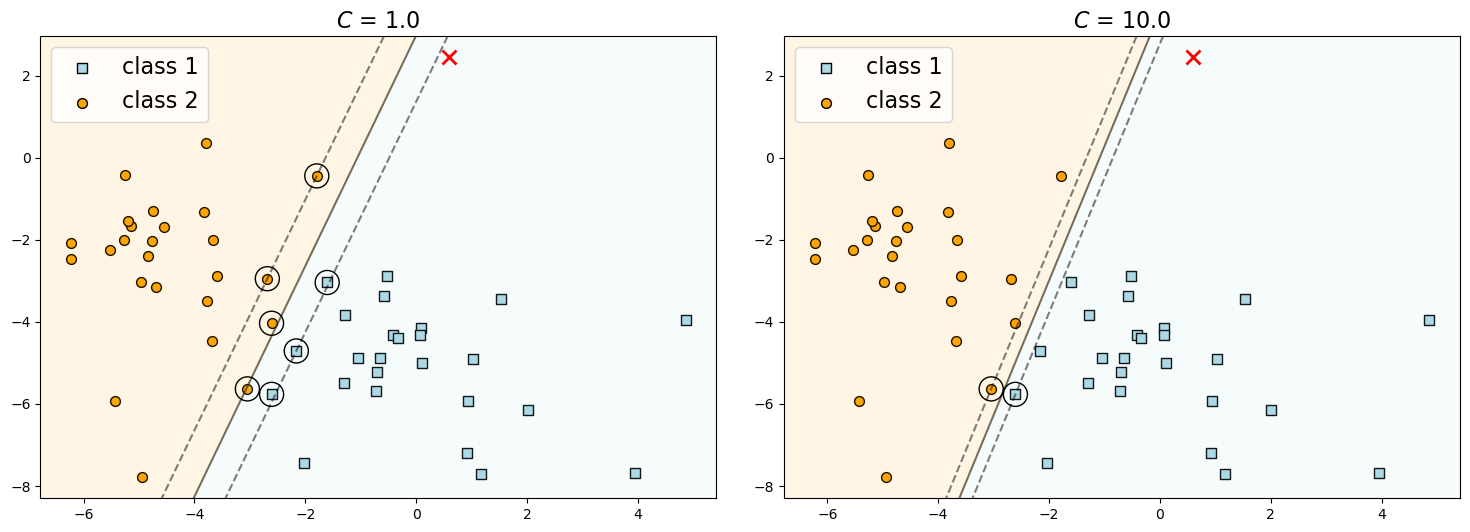

In [124]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

cnt=0
for axi, C in zip(ax, [1, 10]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    
    pipe_svm = make_pipeline(SVC(kernel='linear', C = C))
    
    loocv_scores = cross_validate(pipe_svm, X, y, cv = LeaveOneOut(), return_train_score = True)

    print('C = {0:.1f}, '.format(C))
    print("Training Accuracy: ", (loocv_scores['train_score'].mean())*100, "%")
    print("Testing Accuracy: ", (loocv_scores['test_score'].mean())*100, "%")
    
    axi.scatter(X[y == 0, 0],
            X[y == 0, 1],
            s=50, c='lightblue',
            marker='s', edgecolor='black',
            label='class 1')
    axi.scatter(X[y == 1, 0],
                X[y == 1, 1],
                s=50, c='orange',
                marker='o', edgecolor='black',
                label='class 2')
    axi.plot([0.6], [2.45], 'x', color='red', markeredgewidth=2, markersize=10)
    
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('$C$ = {0:.1f}'.format(C), size=16)
    cnt+=1
    axi.legend(loc='upper left', fontsize=16)

The parameter C in SVM is the regularisation or penalty parameter. It controls the trade-off between training error and complexity of the decision boundary. Smaller C tolerates more misclassifications, resulting in a broader margin. Larger C penalises misclassifications more, leading to a narrower margin. The value of C influences the balance between margin size and classification accuracy in SVM. 

I used C = 1 as an arbituary value which resulted in a LOOCV training accuracy of 98.1% and testing accuracy of 94%. When I increased C to C = 10, this penalised misclassifications more, resulting in tighter margins with no misclassified points. This resulted in an increase of accuracy to 100% and 100% for the training and testing sets respectively. 

I believe C = 1 was slightly underfit, and reducing the regulisation penalty resulted in better performance of the SVM on training and testing data.

### Task 2.1: Repeat step 1.2 and 1.3 from above with DS2. You can change the leave-1-out cross validation to something different. If you do so, explain what you did and why you chose this evaluation approach.